In [3]:
# Step 1: Import pandas
import pandas as pd
from google.colab import files

# Step 2: Upload your CSV file
uploaded = files.upload()  # This will open a file chooser

# Step 3: Load the uploaded CSV into a DataFrame
# The code automatically takes the uploaded file's name
df = pd.read_csv(list(uploaded.keys())[0])

# Step 4: Display the first 5 rows to check your data
df.head()


Saving Fashion_Retail_Sales.csv to Fashion_Retail_Sales (1).csv


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [4]:
# Display first 10 rows
df.head(10)


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash
5,4080,Onesie,2914.0,11-12-2022,4.5,Credit Card
6,4055,Jacket,2571.0,08-07-2023,1.3,Cash
7,3973,Trousers,2419.0,10-11-2022,4.6,Cash
8,4044,Jeans,4771.0,19-05-2023,4.1,Cash
9,4010,Loafers,4233.0,11-06-2023,NaN,Credit Card


In [5]:
# Get info about columns, data types, and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [6]:
# Get basic stats for numeric columns
df.describe()


,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


In [7]:
# Count of missing values per column
df.isnull().sum()


,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


In [12]:
df.columns


Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')

In [15]:
# Replace the names with exactly what df.columns shows
df_clean = df.dropna(subset=['Purchase Amount (USD)', 'Review Rating'])


In [16]:
df_clean.isnull().sum()


,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),0
Date Purchase,0
Review Rating,0
Payment Method,0


----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
Index: 2487 entries, 1 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  2487 non-null   int64  
 1   Item Purchased         2487 non-null   object 
 2   Purchase Amount (USD)  2487 non-null   float64
 3   Date Purchase          2487 non-null   object 
 4   Review Rating          2487 non-null   float64
 5   Payment Method         2487 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 136.0+ KB

----- Summary Statistics -----


,Customer Reference ID,Purchase Amount (USD),Review Rating
count,2487.000000,2487.000000,2487.000000
mean,4040.224769,149.609972,2.986248
std,48.364412,389.263631,1.150691
min,3957.000000,10.000000,1.000000
25%,3998.000000,57.000000,2.000000
50%,4042.000000,110.000000,3.000000
75%,4082.000000,154.000000,4.000000
max,4122.000000,4932.000000,5.000000



Total Sales: $372080.00
Average Sales per Purchase: $149.61
Average Review Rating: 2.99 / 5

----- Top 5 Purchased Items -----


,count
Item Purchased,
Shorts,69
Belt,65
Skirt,63
Camisole,60
Tank Top,60


/tmp/ipython-input-1379836175.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date Purchase'] = pd.to_datetime(df_clean['Date Purchase'], errors='coerce')


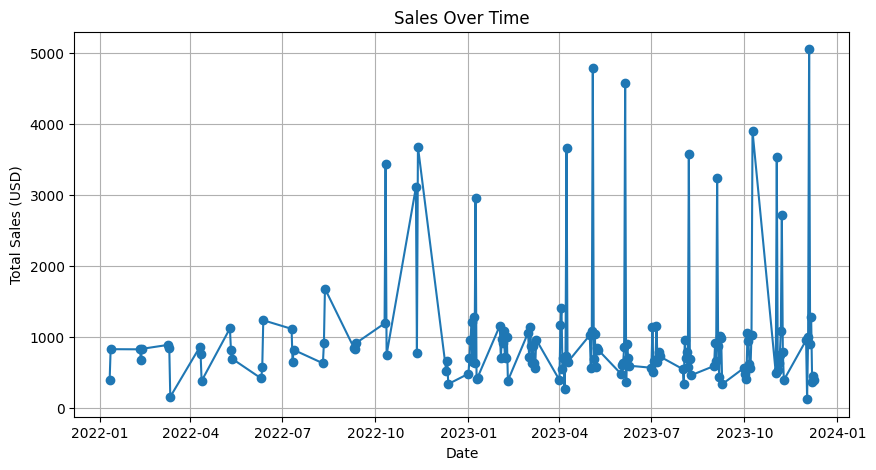

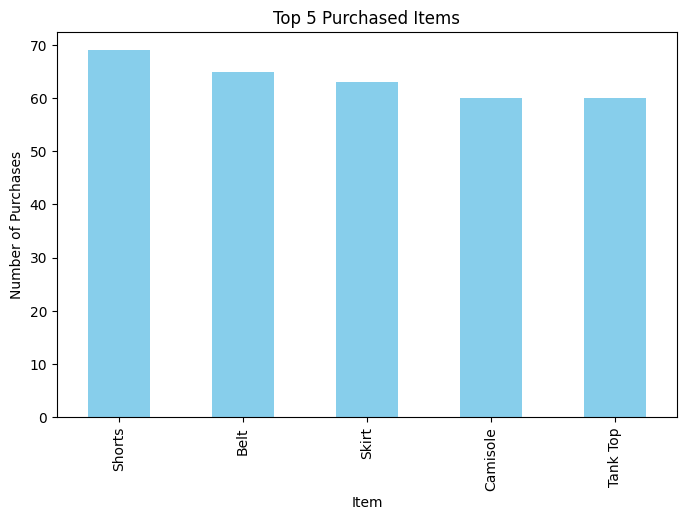

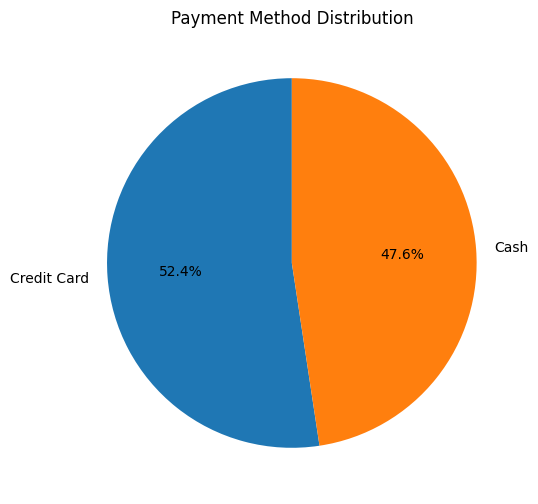

In [17]:
# -------------------------------
# Analysis & Visualization After Cleaning
# -------------------------------

import matplotlib.pyplot as plt

# Step 1: Basic info & summary statistics
print("----- Data Info -----")
df_clean.info()

print("\n----- Summary Statistics -----")
display(df_clean.describe())

# Step 2: Total and average sales
total_sales = df_clean['Purchase Amount (USD)'].sum()
average_sales = df_clean['Purchase Amount (USD)'].mean()
print(f"\nTotal Sales: ${total_sales:.2f}")
print(f"Average Sales per Purchase: ${average_sales:.2f}")

# Step 3: Average review rating
average_rating = df_clean['Review Rating'].mean()
print(f"Average Review Rating: {average_rating:.2f} / 5")

# Step 4: Top 5 purchased items
print("\n----- Top 5 Purchased Items -----")
top_items = df_clean['Item Purchased'].value_counts().head(5)
display(top_items)

# Step 5: Sales over time chart (if 'Date Purchase' exists)
if 'Date Purchase' in df_clean.columns:
    df_clean['Date Purchase'] = pd.to_datetime(df_clean['Date Purchase'], errors='coerce')
    sales_by_date = df_clean.groupby('Date Purchase')['Purchase Amount (USD)'].sum()

    plt.figure(figsize=(10,5))
    plt.plot(sales_by_date.index, sales_by_date.values, marker='o')
    plt.title("Sales Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales (USD)")
    plt.grid(True)
    plt.show()
else:
    print("Column 'Date Purchase' not found. Skipping sales over time chart.")

# Step 6: Top items chart
plt.figure(figsize=(8,5))
top_items.plot(kind='bar', color='skyblue')
plt.title("Top 5 Purchased Items")
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.show()

# Step 7: Payment method distribution chart (if column exists)
if 'Payment Method' in df_clean.columns:
    payment_counts = df_clean['Payment Method'].value_counts()
    plt.figure(figsize=(6,6))
    payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title("Payment Method Distribution")
    plt.ylabel("")
    plt.show()
